In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 71964.76
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
1453,6022a3341d6f9a1f53694bf6,2021-02-09 15:59:00.954,2021-02-09 14:59:00.938,NQH1,BUY,1.0,13703.000000,[0000e1a7.602201a6.01.01],360,867033904,ENTRY,2.10,0.000000
1454,6022a3371d6f9a1f53694bf7,2021-02-09 15:59:03.221,2021-02-09 14:59:03.167,MNQH1,BUY,6.0,13703.625000,"[0000e1a7.602201a7.01.01, 0000e1a7.602201a8.01...",361,867033907,ENTRY,3.12,0.000000
1455,6022b00c1d6f9a1f53694c1c,2021-02-09 16:53:48.485,2021-02-09 15:53:48.418,MNQH1,SELL,6.0,13708.750000,[0000e1a7.60220f3a.01.01],364,867033910,STOP-LOSS,3.12,55.260000
1456,6022b00c1d6f9a1f53694c1d,2021-02-09 16:53:48.813,2021-02-09 15:53:48.765,NQH1,SELL,1.0,13708.750000,[0000e1a7.60220f3b.01.01],362,867033908,STOP-LOSS,2.10,110.800000
1457,602388aa1d6f9a1f53694e46,2021-02-10 08:18:02.592,2021-02-10 07:18:02.570,NQH1,BUY,1.0,13740.000000,[0000e1a7.60233290.01.01],360,129798508,ENTRY,2.10,0.000000
1458,602388b41d6f9a1f53694e47,2021-02-10 08:18:12.549,2021-02-10 07:18:12.396,MNQH1,BUY,7.0,13740.071429,"[0000e1a7.6023328f.01.01, 0000e1a7.60233291.01...",361,129798511,ENTRY,3.64,0.000000
1459,6023955f1d6f9a1f53694e6c,2021-02-10 09:12:15.145,2021-02-10 08:12:15.052,NQH1,SELL,1.0,13743.250000,[0000e1a7.602337c1.01.01],362,129798512,STOP-LOSS,2.10,60.800000
1460,6023955f1d6f9a1f53694e6d,2021-02-10 09:12:15.241,2021-02-10 08:12:15.189,MNQH1,SELL,7.0,13734.107143,"[0000e1a7.602337c2.01.01, 0000e1a7.602337c4.01...",364,129798514,STOP-LOSS,3.64,-90.779999
1461,60239f491d6f9a1f53694e86,2021-02-10 09:54:33.256,2021-02-10 08:54:33.136,NQH1,BUY,1.0,13756.000000,[0000e1a7.60233cbf.01.01],366,129798518,ENTRY,2.10,0.000000
1462,60239f581d6f9a1f53694e87,2021-02-10 09:54:48.473,2021-02-10 08:54:48.313,MNQH1,BUY,7.0,13755.642857,"[0000e1a7.60233cc0.01.01, 0000e1a7.60233cc1.01...",367,129798521,ENTRY,3.64,0.000000


In [3]:
start_date = '20210117'

In [4]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()
df = df.loc[start_date:]

In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
#allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [6]:
allocs

ES       0.333333
YM       0.333333
NQ       0.333333
total    1.000000
dtype: float64

In [7]:
df

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2021-01-19 02:24:32.454,2021-01-19 03:24:32.477,ES,BUY,0.6,3783.75,457,ENTRY,2.82,0.00,72098.350008
2021-01-19 02:24:34.243,2021-01-19 03:24:34.372,ES,BUY,1.0,3783.75,456,ENTRY,2.10,0.00,72098.350008
2021-01-19 17:54:36.475,2021-01-19 18:54:36.561,NQ,BUY,0.1,12942.75,479,ENTRY,0.47,0.00,72098.350008
2021-01-19 17:54:36.788,2021-01-19 18:54:36.800,NQ,BUY,1.0,12942.75,478,ENTRY,2.10,0.00,72098.350008
2021-01-19 21:00:35.876,2021-01-19 22:00:35.898,NQ,SELL,1.0,12974.00,482,STOP-LOSS,2.10,620.80,72719.150008
...,...,...,...,...,...,...,...,...,...,...
2021-02-11 16:43:31.654,2021-02-11 17:43:31.658,NQ,BUY,1.0,13739.25,350,ENTRY,2.10,0.00,79668.330008
2021-02-11 17:15:03.151,2021-02-11 18:15:03.153,YM,SELL,0.1,31309.00,340,STOP-LOSS,0.52,-70.54,79597.790008
2021-02-11 17:15:05.473,2021-02-11 18:15:05.476,YM,SELL,2.0,31307.00,342,STOP-LOSS,4.20,-1418.40,78179.390008


In [8]:
df[df['contract'] == 'ES']

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2021-01-19 02:24:32.454,2021-01-19 03:24:32.477,ES,BUY,0.6,3783.750000,457,ENTRY,2.82,0.00,72098.350008
2021-01-19 02:24:34.243,2021-01-19 03:24:34.372,ES,BUY,1.0,3783.750000,456,ENTRY,2.10,0.00,72098.350008
2021-01-20 17:40:06.366,2021-01-20 18:40:06.468,ES,SELL,0.6,3840.000000,459,TAKE-PROFIT,2.82,1681.86,76948.750008
2021-01-20 17:40:06.464,2021-01-20 18:40:06.475,ES,SELL,1.0,3840.000000,461,TAKE-PROFIT,2.10,2808.30,79757.050008
2021-01-26 12:30:37.216,2021-01-26 13:30:37.223,ES,BUY,0.9,3851.500000,339,ENTRY,4.23,0.00,83301.890008
2021-01-26 12:30:37.245,2021-01-26 13:30:37.331,ES,BUY,1.0,3851.500000,338,ENTRY,2.10,0.00,83301.890008
2021-01-27 04:54:44.991,2021-01-27 05:54:44.997,ES,SELL,0.9,3834.666667,340,STOP-LOSS,4.23,-765.96,82801.630008
2021-01-27 04:54:45.099,2021-01-27 05:54:45.188,ES,SELL,1.0,3835.250000,342,STOP-LOSS,2.10,-816.70,81984.930008
2021-01-27 19:33:01.403,2021-01-27 20:33:01.407,ES,SELL,1.0,3755.500000,356,ENTRY,2.10,0.00,83794.290008


In [9]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -342.62
NQ    3444.32
YM    2293.10
Name: realizedPNL, dtype: float64

In [10]:
df.realizedPNL.sum()

5394.799999999999

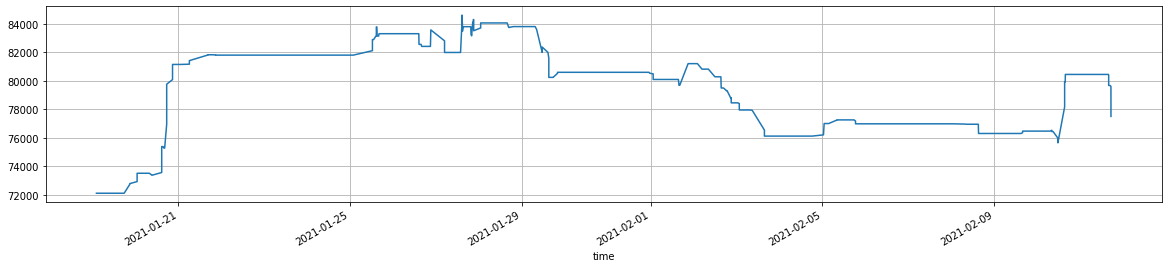

In [11]:
df.cash.plot(figsize=(20,4), grid=True);

In [12]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [13]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     20
 NQ    164
 YM     34
 Name: action, dtype: int64,
 218)

In [14]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.111111
 NQ    9.111111
 YM    1.888889
 Name: action, dtype: float64,
 12.11111111111111)

In [15]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     47.62
NQ    332.68
YM     78.90
Name: commission, dtype: float64

In [16]:
df.commission.sum()

459.20000000000005

In [17]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.41,73.87,675.22,-352.07,1.92,69.12,56.7
ES,0.40,-113.57,1455.70,-1159.74,1.26,-113.56,7.8
YM,0.65,106.50,615.36,-826.41,0.74,110.74,15.5
total,0.45,61.77,725.49,-480.28,1.51,62.32,80.0


In [18]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [19]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,NQ,YM,total
ES,1.000000,0.569608,0.051553,0.819103
NQ,0.569608,1.000000,0.087000,0.856705
YM,0.051553,0.087000,1.000000,0.396033
total,0.819103,0.856705,0.396033,1.000000


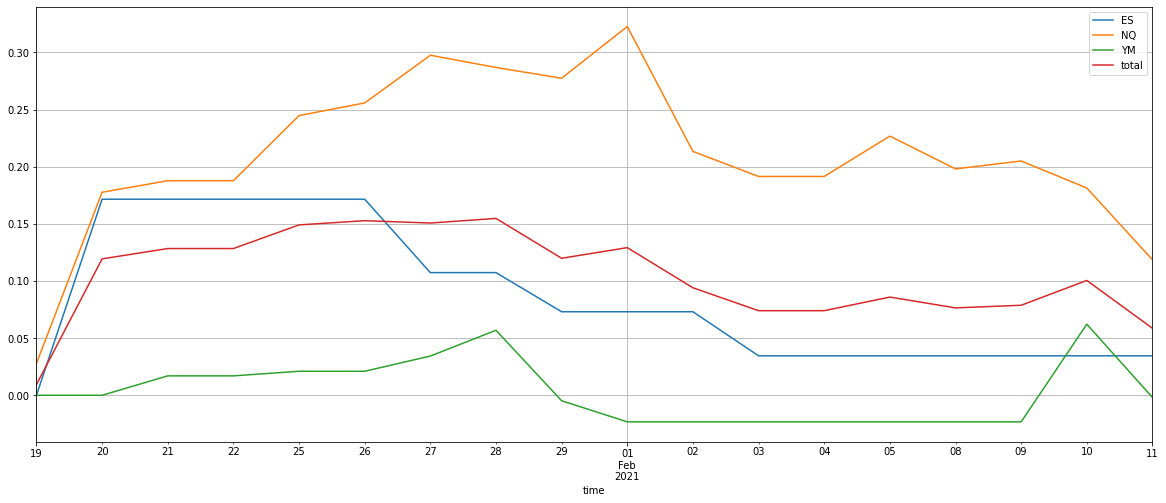

In [20]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

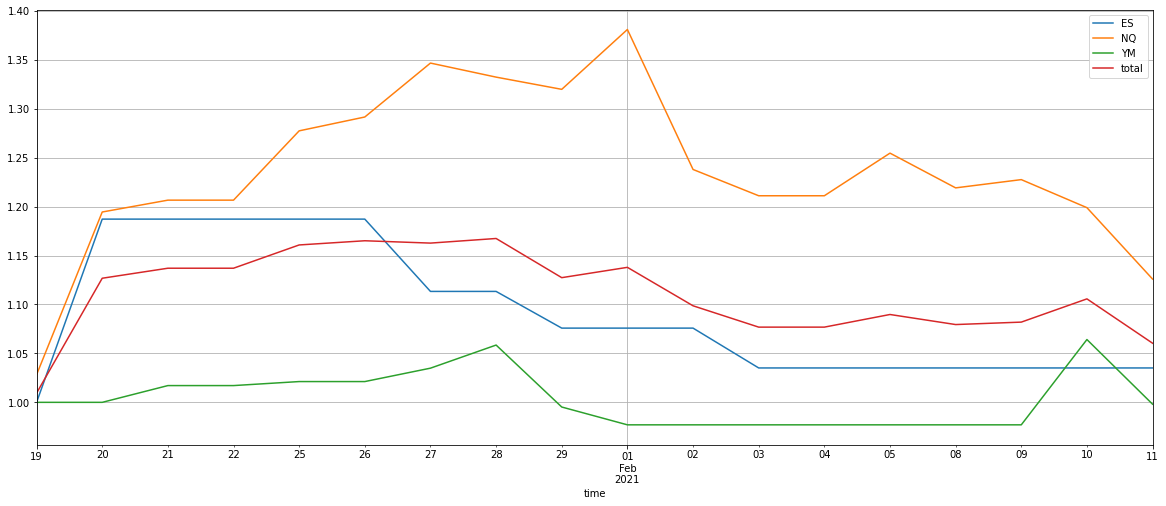

In [21]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [22]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,NQ,YM,total
Annual return,0.621563,4.262611,-0.026158,1.272921
Cumulative returns,0.035131,0.125938,-0.001891,0.060401
Annual volatility,0.782572,0.871211,0.497923,0.532852
Sharpe ratio,0.956406,2.312205,0.180024,1.784433
Calmar ratio,4.853042,23.085753,-0.339739,13.888530
Stability,0.443891,0.002483,0.067286,0.107987
Max drawdown,-0.128077,-0.184642,-0.076994,-0.091653
Omega ratio,1.399798,1.558215,1.045682,1.481352
Sortino ratio,2.493449,4.198387,0.271898,3.774712
Skew,2.958913,0.752790,0.494079,1.952070


In [23]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,NQ,YM,total
time,,,,
2021-01-31,7.58,31.98,-0.48,12.74
2021-02-28,-3.78,-14.69,0.29,-5.94


In [24]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES        4.0
NQ       13.0
YM       -0.0
total     6.0
dtype: float64

In [25]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2021-01-20 17:40:06.464,ES,SELL,3840.00,2808.30
2021-02-10 15:22:40.628,YM,SELL,31260.00,2520.80
2021-01-27 14:33:09.550,NQ,BUY,13292.00,1860.80
2021-01-20 14:53:07.283,NQ,SELL,13162.50,1820.80
2021-02-10 15:22:40.628,YM,SELL,31260.00,1758.22
...,...,...,...,...
2021-01-27 04:54:45.099,ES,SELL,3835.25,-816.70
2021-01-29 11:27:59.551,ES,BUY,3756.75,-1241.70
2021-01-29 15:10:13.339,YM,BUY,30361.00,-1349.20


In [26]:
daily.sort_values('total', ascending=False)

,ES,NQ,YM,total
time,,,,
2021-01-20,0.187182,0.161669,0.000000,0.116284
2021-02-10,0.000000,-0.023350,0.089190,0.021947
2021-01-25,0.000000,0.058686,0.004032,0.020906
2021-02-05,0.000000,0.035960,0.000000,0.011987
2021-01-19,0.000000,0.028216,0.000000,0.009405
2021-02-01,0.000000,0.046329,-0.018286,0.009348
2021-01-21,0.000000,0.010138,0.017119,0.009086
2021-01-28,0.000000,-0.010658,0.022812,0.004051
2021-01-26,0.000000,0.011076,0.000000,0.003692
